In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df = pd.read_csv("data.csv",index_col=False)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,UltraBook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,UltraBook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,UltraBook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,UltraBook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


# Dealing with Screen Resolution

In [3]:
x = df.ScreenResolution.str.split('x',expand=True)
df['Width'] = x[0]
df['Height'] = x[1]

In [4]:
df['Width'] = df['Width'].str.findall(r'\d+?\d+').apply(lambda x : x[0])

In [5]:
df['Width'] = df['Width'].astype(int)
df['Height'] = df['Height'].astype(int)

In [6]:
df.ScreenResolution.unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [7]:
df['IPS'] = df.ScreenResolution.apply(lambda x : 1 if 'IPS' in x else 0)

In [8]:
df['TouchScreen'] = df.ScreenResolution.apply(lambda x : 1 if 'Touchscreen' in x else 0)

In [9]:
df.drop(['ScreenResolution'],axis=1,inplace=True)
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Width,Height,IPS,TouchScreen
0,Apple,UltraBook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560,1600,1,0
1,Apple,UltraBook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440,900,0,0
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1920,1080,0,0
3,Apple,UltraBook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2880,1800,1,0
4,Apple,UltraBook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,2560,1600,1,0


## Dealing with memory

In [10]:
df.Memory.unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [11]:
memory = df.Memory.str.split("+",expand=True)

In [12]:
memory[0].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD ', '256GB SSD ',
       '64GB Flash Storage', '32GB SSD', '2TB HDD', '64GB SSD',
       '1.0TB Hybrid', '512GB SSD ', '1TB SSD', '16GB SSD',
       '16GB Flash Storage', '64GB Flash Storage ', '180GB SSD',
       '1TB HDD ', '32GB HDD', '1TB SSD ', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD'],
      dtype=object)

In [13]:
ssd = []
flash = []
hdd = []
hybrid = []

In [14]:
for i in memory[0]:
    if 'SSD' in i:
        ssd.append(re.search('\d+',i)[0])
        flash.append(0)
        hdd.append(0)
        hybrid.append(0)
        
    elif 'Flash' in i:
        flash.append(re.search('\d+',i)[0])
        ssd.append(0)
        hdd.append(0)
        hybrid.append(0)
        
    elif 'HDD' in i:
        hdd.append(re.search('\d+',i)[0])
        flash.append(0)
        ssd.append(0)
        hybrid.append(0)
        
    elif 'Hybrid' in i:
        hybrid.append(re.search('\d+',i)[0])
        flash.append(0)
        ssd.append(0)
        hdd.append(0)


In [15]:
ssd = np.array(ssd).astype(int)
flash = np.array(flash).astype(int)
hybrid = np.array(hybrid).astype(int)
hdd = np.array(hdd).astype(int)

In [16]:
memory[1].unique()

array([None, '  1TB HDD', '  256GB SSD', '  2TB HDD', '  500GB HDD',
       '  512GB SSD', '  1.0TB Hybrid'], dtype=object)

In [17]:
for index,data in enumerate(memory[1]):
    if 'HDD' in str(data):
        hdd[index] += int(re.search(r'\d+',data)[0])
    elif 'SSD' in str(data):
        ssd[index] += int(re.search(r'\d+',data)[0])
    elif 'Flash' in str(data):
        flash[index] += int(re.search(r'\d+',data)[0])
    elif 'Hybrid' in str(data):
        hybrid[index] += int(re.search(r'\d+',data)[0])

In [18]:
df['SSD'] = ssd
df['HDD'] = hdd
df['FlashStorage'] = flash
df['Hybrid'] = hybrid

df['SSD'] = np.where(df['SSD']==1,1024,df.SSD)
df['HDD'] = np.where(df['HDD']<=2,df.HDD*1024,df.HDD)
df['Hybrid'] = np.where(df['Hybrid']==1,1024,df.Hybrid)

df=df[df.SSD!=8]

df.drop(['Memory'],axis=1,inplace=True)

# Dealing with Ram

In [19]:
df.Ram = df.Ram.str.split('GB',expand=True)[0].astype(int)

# Dealing with weight

In [20]:
df.Weight = df.Weight.str.split('kg',expand=True)[0].astype(float)

## Dealing with cpu

In [21]:
cpu_speed = []

for i in df.Cpu:
    s = ""
    cpu_speed.append(s.join(re.findall(r"\d(?=\.)\.|\d+GHz",i)))
    
df['CpuSpeed'] = cpu_speed
df['CpuSpeed'] = df.CpuSpeed.str.split('GHz',expand=True)[0].astype(float)

In [22]:
df['CpuCompany'] = df.Cpu.str.split(" ",expand=True)[0]

In [23]:
df.drop(['Cpu'],axis=1,inplace=True)

## Dealing with Gpu

In [24]:
df['GPU_Company'] = df.Gpu.str.split(" ",expand=True)[0]
df = df[df.GPU_Company!='ARM']

In [25]:
df.drop(['Gpu'],axis=1,inplace=True)

In [26]:
df.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Width,Height,IPS,TouchScreen,SSD,HDD,FlashStorage,Hybrid,CpuSpeed,CpuCompany,GPU_Company
0,Apple,UltraBook,13.3,8,macOS,1.37,71378.6832,2560,1600,1,0,128,0,0,0,2.3,Intel,Intel
1,Apple,UltraBook,13.3,8,macOS,1.34,47895.5232,1440,900,0,0,0,0,128,0,1.8,Intel,Intel
2,HP,Notebook,15.6,8,No OS,1.86,30636.0000,1920,1080,0,0,256,0,0,0,2.5,Intel,Intel
3,Apple,UltraBook,15.4,16,macOS,1.83,135195.3360,2880,1800,1,0,512,0,0,0,2.7,Intel,AMD
4,Apple,UltraBook,13.3,8,macOS,1.37,96095.8080,2560,1600,1,0,256,0,0,0,3.1,Intel,Intel


## Dealing with OS

In [27]:
df.OpSys.value_counts()

Windows 10      1071
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [28]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    elif inp == 'Android' or inp == 'Chrome OS' or inp=='Linux':
        return 'Other'
    else:
        return 'No os'

In [29]:
df['OS'] = df.OpSys.apply(cat_os)
df.drop(['OpSys'],axis=1,inplace=True)

In [30]:
df.OS.value_counts()

Windows    1124
Other        90
No os        66
Mac          21
Name: OS, dtype: int64

In [31]:
df.to_csv("CleanedData.csv",index=False)

In [32]:
df = pd.read_csv("CleanedData.csv")
df.head()

,Company,TypeName,Inches,Ram,Weight,Price,Width,Height,IPS,TouchScreen,SSD,HDD,FlashStorage,Hybrid,CpuSpeed,CpuCompany,GPU_Company,OS
0,Apple,UltraBook,13.3,8,1.37,71378.6832,2560,1600,1,0,128,0,0,0,2.3,Intel,Intel,Mac
1,Apple,UltraBook,13.3,8,1.34,47895.5232,1440,900,0,0,0,0,128,0,1.8,Intel,Intel,Mac
2,HP,Notebook,15.6,8,1.86,30636.0000,1920,1080,0,0,256,0,0,0,2.5,Intel,Intel,No os
3,Apple,UltraBook,15.4,16,1.83,135195.3360,2880,1800,1,0,512,0,0,0,2.7,Intel,AMD,Mac
4,Apple,UltraBook,13.3,8,1.37,96095.8080,2560,1600,1,0,256,0,0,0,3.1,Intel,Intel,Mac


<AxesSubplot:xlabel='Company', ylabel='Price'>

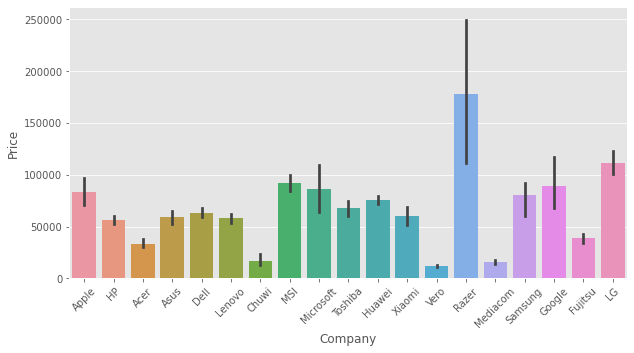

In [33]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.barplot(data=df,x='Company',y='Price')

<AxesSubplot:xlabel='Ram', ylabel='Price'>

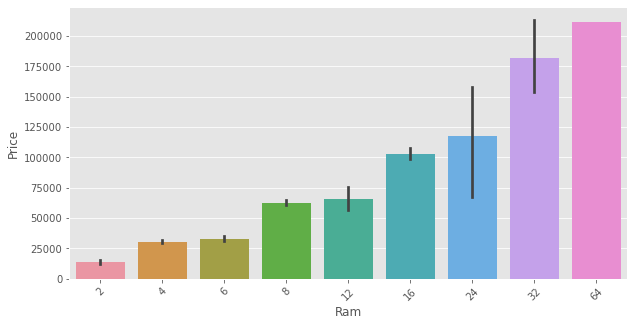

In [34]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.barplot(data=df,x='Ram',y='Price')

<AxesSubplot:xlabel='TouchScreen', ylabel='Price'>

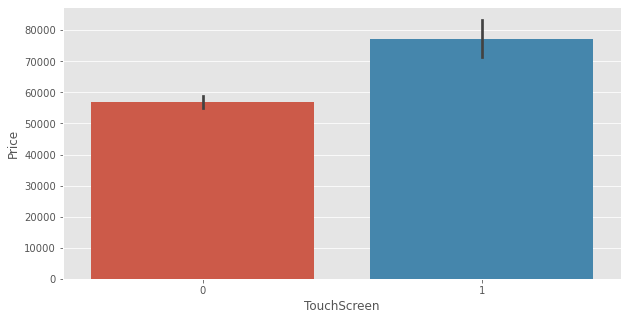

In [35]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='TouchScreen',y='Price')

<AxesSubplot:xlabel='CpuCompany', ylabel='Price'>

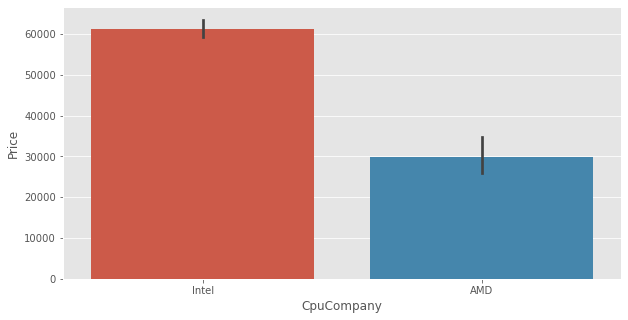

In [36]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='CpuCompany',y='Price')

<AxesSubplot:xlabel='GPU_Company', ylabel='Price'>

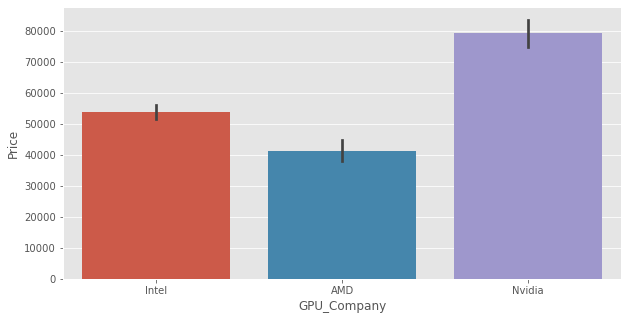

In [37]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='GPU_Company',y='Price')

<AxesSubplot:xlabel='OS', ylabel='Price'>

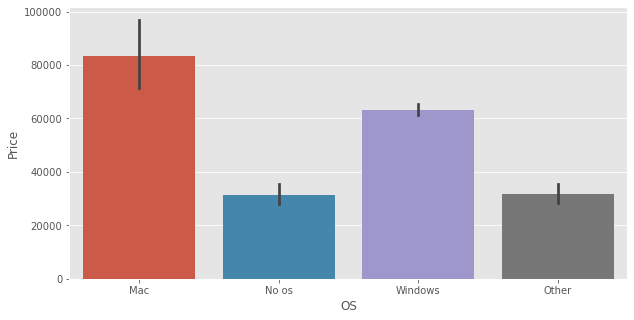

In [38]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='OS',y='Price')

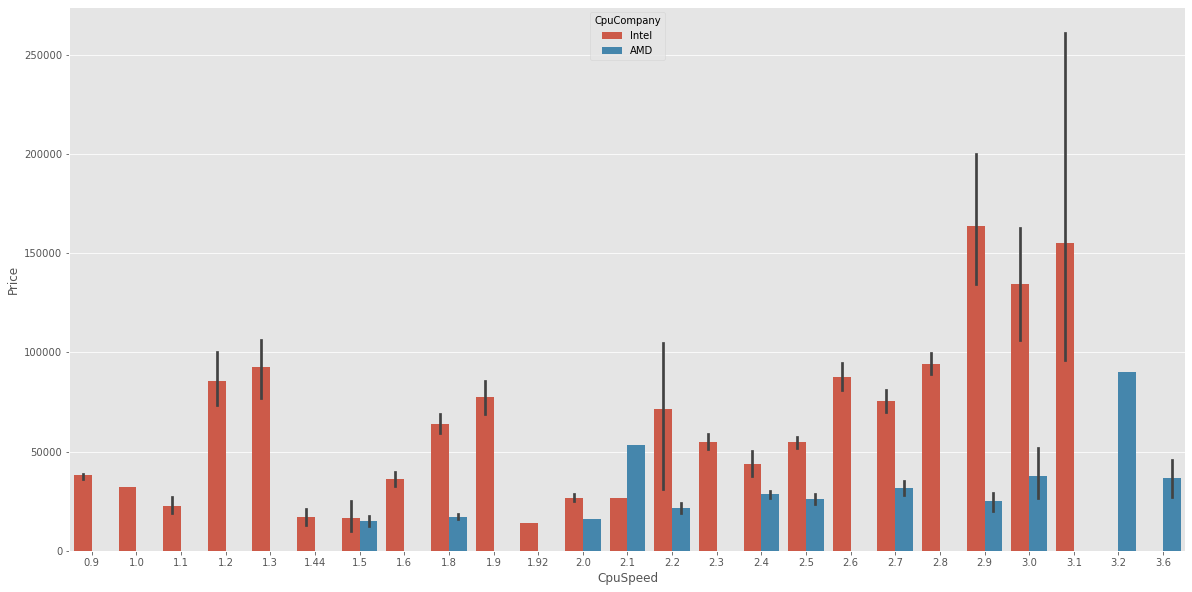

In [39]:
plt.figure(figsize=(20,10))
sns.barplot(data=df,x='CpuSpeed',y='Price',hue='CpuCompany');

<AxesSubplot:xlabel='Weight', ylabel='Price'>

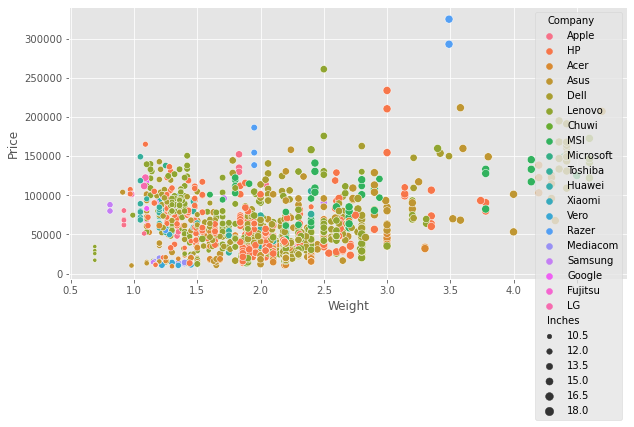

In [40]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x='Weight',y='Price',hue='Company',size='Inches')

<AxesSubplot:xlabel='Inches', ylabel='Price'>

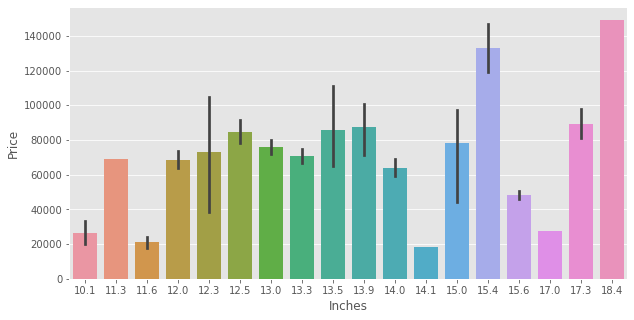

In [41]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='Inches',y='Price')

<AxesSubplot:xlabel='TypeName', ylabel='Price'>

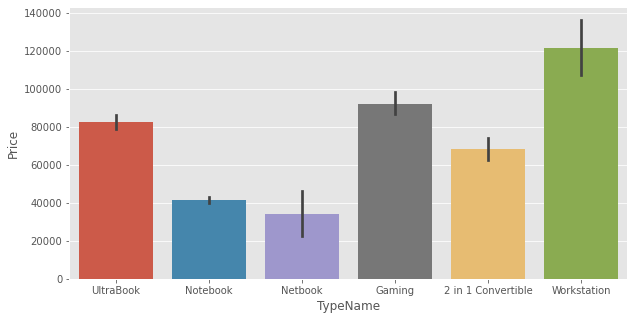

In [42]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='TypeName',y='Price')

<AxesSubplot:xlabel='SSD', ylabel='Price'>

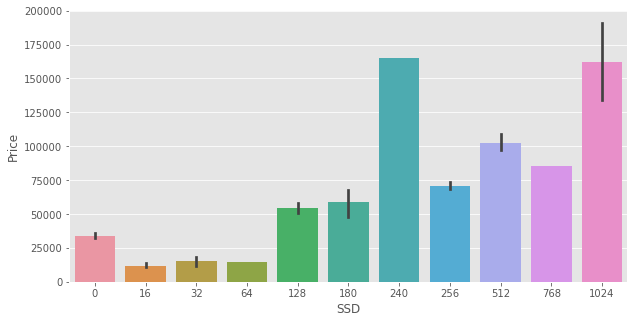

In [43]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='SSD',y='Price')

<AxesSubplot:xlabel='FlashStorage', ylabel='Price'>

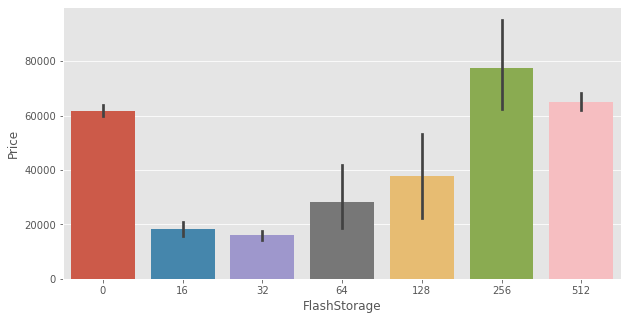

In [44]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='FlashStorage',y='Price')

In [45]:
df.skew()

C:\Users\Pratham\AppData\Local\Temp/ipykernel_15168/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Inches          -0.446705
Ram              2.685397
Weight           1.145064
Price            1.524221
Width            2.190664
Height           2.105497
IPS              0.986539
TouchScreen      1.998198
SSD              1.426932
HDD              0.893417
FlashStorage    11.094902
Hybrid          10.507660
CpuSpeed        -0.832577
dtype: float64

<AxesSubplot:xlabel='Price', ylabel='Count'>

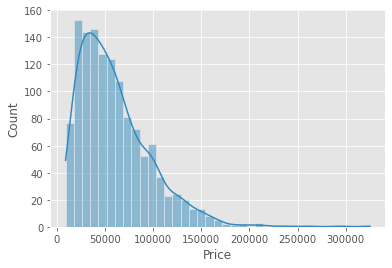

In [46]:
sns.histplot(df.Price,kde=True)

<AxesSubplot:>

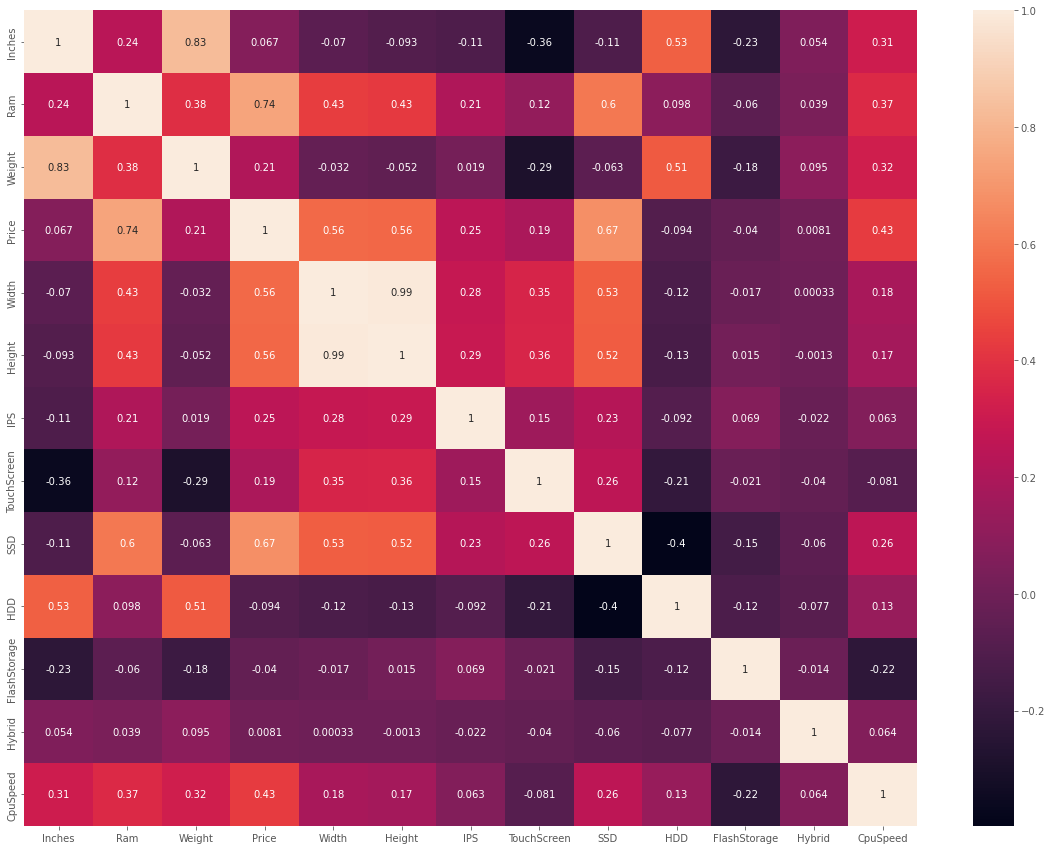

In [47]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X = df.drop(['Price'],axis=1)
y = np.log(df['Price'])

-0.17451552878541737


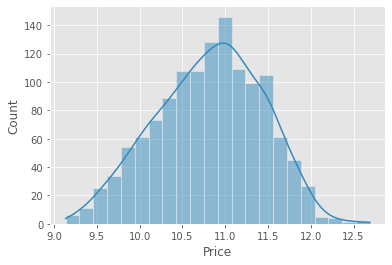

In [51]:
sns.histplot(y,kde=True)
print(y.skew())

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [53]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [54]:
ohe = make_column_transformer((OneHotEncoder(),['Company','TypeName','CpuCompany','GPU_Company','OS']),remainder="passthrough")

In [55]:
rfr = Pipeline([("ohe",ohe),("model",RandomForestRegressor())])

In [56]:
knn = Pipeline([("ohe",ohe),("ss",StandardScaler()),("model",KNeighborsRegressor())])

In [57]:
svr = Pipeline([("ohe",ohe),("ss",StandardScaler()),("model",SVR())])

In [58]:
xg = Pipeline([("ohe",ohe),("model",XGBRegressor())])

In [59]:
models = [rfr,knn,svr,xg,"cat"]

In [60]:
scores = {}
mse={}
trained_models = {}
model_names = ["RandomForestRegressor","KNearestNeighbours","SupportVectorMachine","XGBoost","CatBoost"]
for index,model in enumerate(models):
    if model_names[index]=='CatBoost':
        model  = CatBoostRegressor(verbose=False)
        model.fit(X_train,y_train,cat_features=['Company','TypeName','CpuCompany','GPU_Company','OS'])
    else:
        model.fit(X_train,y_train)
        
    trained_models[model_names[index]] = model
    y_preds = model.predict(X_test)
    scores[model_names[index]] = r2_score(y_test,y_preds)
    mse[model_names[index]] = mean_squared_error(y_test,y_preds)


In [61]:
print(scores,mse)

{'RandomForestRegressor': 0.8621689326038334, 'KNearestNeighbours': 0.7366701673088647, 'SupportVectorMachine': 0.84362497571455, 'XGBoost': 0.8680627030528578, 'CatBoost': 0.8762004331161337} {'RandomForestRegressor': 0.05033291475873159, 'KNearestNeighbours': 0.0961623404118148, 'SupportVectorMachine': 0.05710476539466343, 'XGBoost': 0.04818063769070585, 'CatBoost': 0.045208915267435805}


## We will proceed with CatBoost model

In [62]:
import pickle
pickle.dump(trained_models['CatBoost'], open("model.pkl", 'wb'))